# Challenge 5

* We measure a spectrum of 10 guassian-distributed variables (`x`), indexed by an energy variable `E`.

* Signal and background are distributed differently in every bin:

    * `b(E)` is constant and equal to `B=60`.
    * `s(E)` follows a gaussian distribution: `s(E) = S*exp((E-E_0) / 2 \sigma_E^2)` with `E_0=4` and `\sigma_E=1`.
    * `S` is unknown and we want to estimate it from the data.
    

E =  [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
x =  [62, 69, 74, 86, 69, 81, 68, 54, 66, 71]


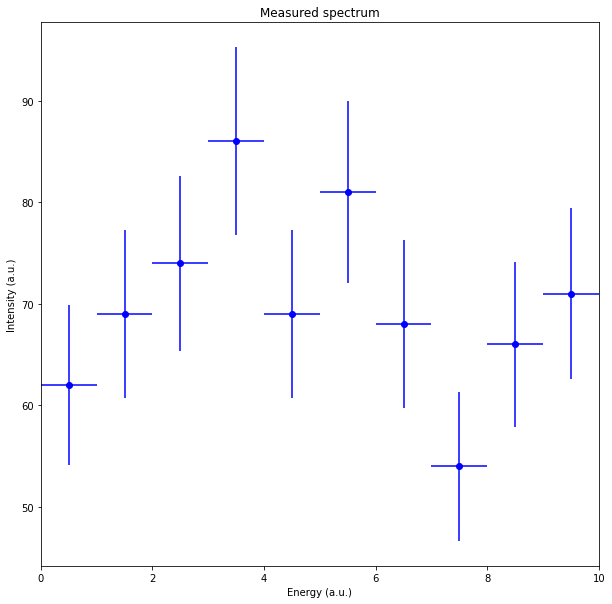

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(
    0
)  # We manually set the seed for reproducible results, this is not required

E = np.arange(0, 10) + 0.5
print("E = ", E)

intensity_data = [62, 69, 74, 86, 69, 81, 68, 54, 66, 71]
print("x = ", intensity_data)

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim([0, 10])

ax.set_xlabel("Energy (a.u.)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Measured spectrum")

ax.errorbar(
    E, intensity_data, xerr=0.5, fmt="o", yerr=np.sqrt(intensity_data), color="blue"
)

plt.show()

In [2]:
def fit_func(E, S, E_0=4, sigma_E=1, B=60):
    return B + S * np.exp(-((E - E_0) ** 2) / (2 * sigma_E ** 2))

In [3]:
def chi2_estimator(y, f, sigma):
    result = 0
    for i in range(len(y)):
        result += ((y[i] - f[i]) ** 2) / (sigma[i] ** 2)
    return result

We compute the fit function for different values of S to compare the chi2 estimator

S=24.26


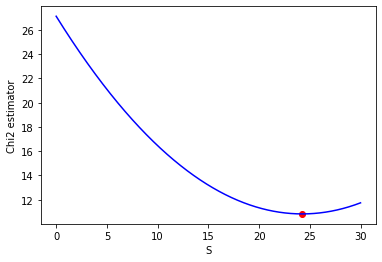

In [4]:
S_values = []
chi2_values = []

chi2_min = 1e10
S_result = 0

for S in np.linspace(0, 30, 1000):
    y = intensity_data
    sigma = np.sqrt(y) * 0 + 8
    f = [fit_func(energy, S=S) for energy in E]
    chi2 = chi2_estimator(y, f, sigma)

    # print(chi2)

    S_values.append(S)
    chi2_values.append(chi2)

    if chi2 < chi2_min:
        chi2_min = chi2
        S_result = S

print(f"S={S_result:0.2f}")

plt.plot(S_values, chi2_values, color="blue")
plt.scatter([S_result], [chi2_min], color="red")

plt.xlabel("S")
plt.ylabel("Chi2 estimator")

plt.show()

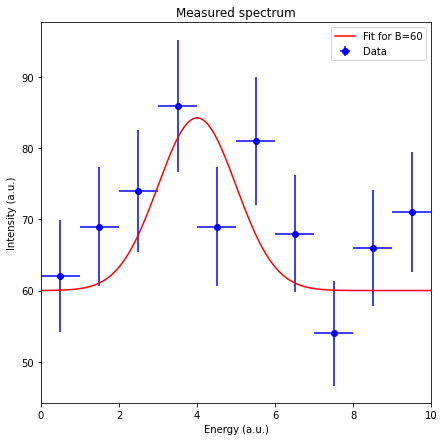

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlim([0, 10])

ax.set_xlabel("Energy (a.u.)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Measured spectrum")

ax.errorbar(
    E,
    intensity_data,
    xerr=0.5,
    fmt="o",
    yerr=np.sqrt(intensity_data),
    color="blue",
    label="Data",
)

E_plt = np.linspace(0, 10, 1000)
ax.plot(E_plt, fit_func(E_plt, S=S_result), color="red", label="Fit for B=60")

plt.legend()
plt.show()

### Goodness of fit for B=60

We have 10 data points and one free parameter (S), so the number of degrees of freedom of the chi2 is 9

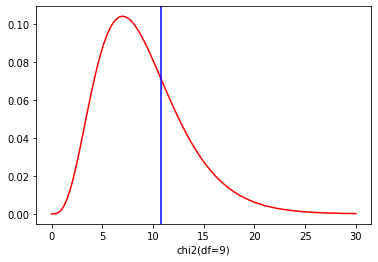

p-value = 0.29


In [6]:
from scipy.stats import chi2

x = np.linspace(0, 30, 100)
y = chi2(df=9).pdf(x)

plt.xlabel("chi2(df=9)")
plt.plot(x, y, color="red")
plt.axvline(x=chi2_min, color="blue")
plt.show()

print(f"p-value = {1 - chi2(df=9).cdf(chi2_min):0.2f}")

## Verify Chi2_min follows a Chi2 distribution

We do a MC simulation for 10000 samples

In [7]:
from scipy.stats import norm

number_of_samples = 10000

B = 60
E_0 = 4

S = 24.26

sigma = 8


def find_chi2_min(sample):
    chi2_min = 1e10
    S_min = 0

    for S_it in np.linspace(5, 50, 200):
        f = [fit_func(energy, S=S_it, B=B, E_0=E_0) for energy in E]
        chi2 = chi2_estimator(sample, f, np.ones(len(y)) * sigma)
        if chi2 < chi2_min:
            chi2_min = chi2
            S_min = S_it

    return chi2_min, S_min


chi2min_list = []
Smin_list = []

for i in range(number_of_samples):
    if i % int(number_of_samples / 100) == 0:
        print(str(i / number_of_samples * 100) + '%')

    sample = np.array(
        [
            norm.rvs(size=1, loc=fit_func(energy, S=S, B=B, E_0=E_0), scale=sigma)[0]
            for energy in E
        ]
    )

    chi2min, Smin = find_chi2_min(sample)
    chi2min_list.append(chi2min)
    Smin_list.append(Smin)

0.0%
1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.000000000000001%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.000000000000002%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.000000000000004%
28.999999999999996%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.00000000000001%
56.00000000000001%
56.99999999999999%
57.99999999999999%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%


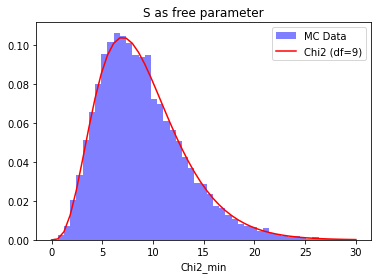

In [8]:
bins = np.linspace(0, 30, 50)
plt.hist(
    chi2min_list, bins=bins, density=True, label="MC Data", alpha=0.5, color="blue"
)

from scipy.stats import chi2

plt.plot(bins, chi2(df=10 - 1).pdf(bins), label="Chi2 (df=9)", color="red")

plt.legend()
plt.title("S as free parameter")
plt.xlabel("Chi2_min")
plt.show()

### Now with S and B as free parameters

In [9]:
chi2_min = 1e10
S_result = 0
B_result = 0

for S in np.linspace(10, 30, 500):
    for B in np.linspace(50, 80, 500):
        y = intensity_data
        sigma = np.sqrt(y)
        f = [fit_func(energy, S=S, B=B) for energy in E]
        chi2 = chi2_estimator(y, f, sigma)

        if chi2 < chi2_min:
            chi2_min = chi2
            S_result = S
            B_result = B

print(f"S={S_result:0.2f}, B={B_result:0.2f}")

S=15.61, B=65.39


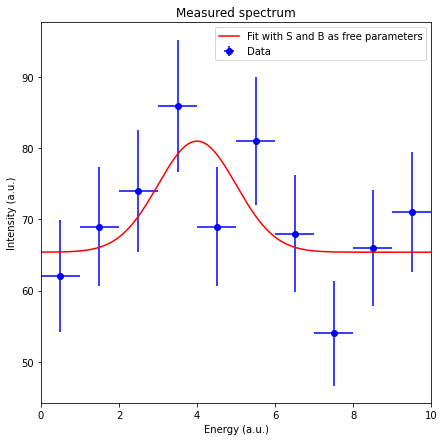

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_xlim([0, 10])

ax.set_xlabel("Energy (a.u.)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Measured spectrum")

ax.errorbar(
    E,
    intensity_data,
    xerr=0.5,
    fmt="o",
    yerr=np.sqrt(intensity_data),
    color="blue",
    label="Data",
)

E_plt = np.linspace(0, 10, 1000)
ax.plot(
    E_plt,
    fit_func(E_plt, S=S_result, B=B_result),
    color="red",
    label="Fit with S and B as free parameters",
)

plt.legend()
plt.show()

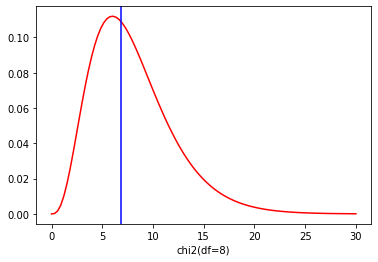

p-value = 0.56


In [11]:
from scipy.stats import chi2

x = np.linspace(0, 30, 100)
y = chi2(df=8).pdf(x)

plt.xlabel("chi2(df=8)")
plt.plot(x, y, color="red")
plt.axvline(x=chi2_min, color="blue")
plt.show()

print(f"p-value = {1 - chi2(df=8).cdf(chi2_min):0.2f}")

## Verify Chi2_min follows a Chi2 distribution

This may take a while, you are free to tune the parameters to make it faster. The most important parameter is `number_of_samples`.

In [ ]:
from scipy.stats import norm

number_of_samples = 1000

E_0 = 4

S = 15.61
B = 65.39

sigma = 8


def find_chi2_min(sample):
    chi2_min = 1e10

    for S_it in np.linspace(10, 30, 100):
        for B_it in np.linspace(55, 75, 100):
            f = [fit_func(energy, S=S_it, B=B_it, E_0=E_0) for energy in E]
            chi2 = chi2_estimator(sample, f, np.ones(len(y)) * sigma)
            if chi2 < chi2_min:
                chi2_min = chi2
                S_min = S_it

    return chi2_min


chi2min_list = []

for i in range(number_of_samples):
    if i % int(number_of_samples / 100) == 0:
        print(str(i / number_of_samples * 100) + '%')

    sample = np.array(
        [
            norm.rvs(size=1, loc=fit_func(energy, S=S, B=B, E_0=E_0), scale=sigma)[0]
            for energy in E
        ]
    )

    chi2min = find_chi2_min(sample)
    chi2min_list.append(chi2min)

0.0%
1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.000000000000001%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.000000000000002%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.000000000000004%
28.999999999999996%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.00000000000001%
56.00000000000001%
56.99999999999999%
57.99999999999999%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%


In [ ]:
bins = np.linspace(0, 30, 50)
plt.hist(
    chi2min_list, bins=bins, density=True, label="MC Data", alpha=0.5, color="blue"
)

from scipy.stats import chi2

plt.plot(bins, chi2(df=10 - 2).pdf(bins), label="Chi2 (df=8)", color="red")

plt.legend()
plt.title("S and B as free parameter")
plt.xlabel("Chi2_min")
plt.show()